In [1]:
!pip install kmodes

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.preprocessing import OneHotEncoder

In [3]:
jobs=pd.read_csv('jobs_naukri_1.csv', error_bad_lines=False,sep=',')

In [4]:
jobs.head()

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [5]:
print(jobs['Key Skills'].value_counts())


Help Desk| Customer Service| customer relationship| access controls| Asset Management| Vendor Management                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   101
Counselor| Mentor| Trainer| Advisor| Teaching                                                                                                                                                                                            

In [6]:
print(pd.get_dummies(jobs['Industry']).head(5))

   * A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for more info

In [7]:
print(pd.get_dummies(jobs['Role Category']).head(5))

    Dear Candidate� Greetings from IndiaMART Company Profile: IndiaMART is India's largest online B2B marketplace, connecting buyers with suppliers. With 60% market share of the online B2B Classified space in India, the channel focuses on providing a platform to Small & Medium Enterprises (SMEs), large enterprises as well as individuals. Founded in 1999, the company's mission is to make doing business easy.� � IndiaMART offers a platform to 5.98 Crore buyers to search from over 5.01 crore products and get connected with over 47 lakhs reliable and competitive suppliers.� IndiaMART has been the proud recipient of the Red Herring 100 Asia Award in 2008, as one of the top promising Asian companies driving the future of technology. Led by innovation and backed by experience, the company introduced a pioneering service in 2012 called Buy Leads. The commitment to bring affordable and low-cost solutions to the SMEs laid the foundation for this low-cost solution, which was bestowed with the Man

In [8]:
jobs.isnull().any().sum()

9

In [9]:
jobs.isnull().sum().sort_values(ascending=False)

Role Category              2149
Key Skills                 1243
Role                        790
Location                    473
Job Title                   471
Job Experience Required     469
Functional Area             469
Industry                    469
Job Salary                   51
Uniq Id                       0
Crawl Timestamp               0
dtype: int64

In [10]:
jobs=jobs.dropna(axis=0)

In [11]:
jobs.isnull().sum().sort_values(ascending=False)

Uniq Id                    0
Crawl Timestamp            0
Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [12]:
jobs.head(5)

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [13]:
print(pd.get_dummies(jobs['Role Category']).head(5))

    Dear Candidate� Greetings from IndiaMART Company Profile: IndiaMART is India's largest online B2B marketplace, connecting buyers with suppliers. With 60% market share of the online B2B Classified space in India, the channel focuses on providing a platform to Small & Medium Enterprises (SMEs), large enterprises as well as individuals. Founded in 1999, the company's mission is to make doing business easy.� � IndiaMART offers a platform to 5.98 Crore buyers to search from over 5.01 crore products and get connected with over 47 lakhs reliable and competitive suppliers.� IndiaMART has been the proud recipient of the Red Herring 100 Asia Award in 2008, as one of the top promising Asian companies driving the future of technology. Led by innovation and backed by experience, the company introduced a pioneering service in 2012 called Buy Leads. The commitment to bring affordable and low-cost solutions to the SMEs laid the foundation for this low-cost solution, which was bestowed with the Man

In [14]:
jobs.shape

(26946, 11)

In [15]:
jobs.values

array([['9be62c49a0b7ebe982a4af1edaa7bc5f', '2019-07-05 01:46:07 +0000',
        'Digital Media Planner', ...,
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management',
        'Media Planning Executive/Manager'],
       ['3c52d436e39f596b22519da2612f6a56', '2019-07-06 08:04:50 +0000',
        'Online Bidding Executive', ...,
        'Sales , Retail , Business Development',
        'IT-Software, Software Services', 'Sales Executive/Officer'],
       ['ffad8a2396c60be2bf6d0e2ff47c58d4', '2019-08-05 15:50:44 +0000',
        'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
        'Engineering Design , R&D', 'Recruitment, Staffing',
        'R&D Executive'],
       ...,
       ['43d5b806b26ed99d3ebfc8f366b4cdd1', '2019-08-05 09:41:29 +0000',
        'Assoc. Prof.- CS', ...,
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training', 'Lecturer/Professor'],
       ['8bc87d14cf56564f16

In [16]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [17]:
jobs.values

array([['9be62c49a0b7ebe982a4af1edaa7bc5f', '2019-07-05 01:46:07 +0000',
        'Digital Media Planner', ...,
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management',
        'Media Planning Executive/Manager'],
       ['3c52d436e39f596b22519da2612f6a56', '2019-07-06 08:04:50 +0000',
        'Online Bidding Executive', ...,
        'Sales , Retail , Business Development',
        'IT-Software, Software Services', 'Sales Executive/Officer'],
       ['ffad8a2396c60be2bf6d0e2ff47c58d4', '2019-08-05 15:50:44 +0000',
        'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
        'Engineering Design , R&D', 'Recruitment, Staffing',
        'R&D Executive'],
       ...,
       ['43d5b806b26ed99d3ebfc8f366b4cdd1', '2019-08-05 09:41:29 +0000',
        'Assoc. Prof.- CS', ...,
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training', 'Lecturer/Professor'],
       ['8bc87d14cf56564f16

In [18]:
jobs.shape

(26946, 11)

In [19]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26946 entries, 0 to 29785
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  26946 non-null  object
 1   Crawl Timestamp          26946 non-null  object
 2   Job Title                26946 non-null  object
 3   Job Salary               26946 non-null  object
 4   Job Experience Required  26946 non-null  object
 5   Key Skills               26946 non-null  object
 6   Role Category            26946 non-null  object
 7   Location                 26946 non-null  object
 8   Functional Area          26946 non-null  object
 9   Industry                 26946 non-null  object
 10  Role                     26946 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [20]:
jobs['Role Category']

0                                       Advertising
1                                      Retail Sales
2                                               R&D
3        Admin/Maintenance/Security/Datawarehousing
4                              Programming & Design
                            ...                    
29781                          Programming & Design
29782                                    Operations
29783                              University Level
29784                          Programming & Design
29785                      Online/Digital Marketing
Name: Role Category, Length: 26946, dtype: object

In [21]:
print(pd.get_dummies(jobs['Industry']).head(5))

   * A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for more info

In [22]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'Uniq Id' has '26946'uniques categories
Feature 'Crawl Timestamp' has '26007'uniques categories
Feature 'Job Title' has '21595'uniques categories
Feature 'Job Salary' has '1027'uniques categories
Feature 'Job Experience Required' has '245'uniques categories
Feature 'Key Skills' has '25224'uniques categories
Feature 'Role Category' has '178'uniques categories
Feature 'Location' has '2414'uniques categories
Feature 'Functional Area' has '61'uniques categories
Feature 'Industry' has '114'uniques categories
Feature 'Role' has '603'uniques categories


In [23]:
jobs.head()

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [24]:
jobs.columns


Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [25]:
jobs.head()


Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [26]:
print(jobs['Role Category'].value_counts())

Programming & Design                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [27]:
jobs_enhanced=jobs['Role Category'].value_counts()>=30

In [28]:
jobs_enhanced.head()

Programming & Design                          True
Voice                                         True
Retail Sales                                  True
HR/ Recruitment / IR                          True
Admin/Maintenance/Security/Datawarehousing    True
Name: Role Category, dtype: bool

In [29]:
jobs_enhanced[jobs_enhanced].shape

(54,)

In [30]:
jobs.shape

(26946, 11)

In [31]:
roles=jobs_enhanced[jobs_enhanced].index

In [32]:
roles

Index(['Programming & Design', 'Voice', 'Retail Sales', 'HR/ Recruitment / IR',
       'Admin/Maintenance/Security/Datawarehousing', 'Accounts',
       'Senior Management', 'Other', 'Corporate Sales',
       'Production/Manufacturing/Maintenance',
       'System Design/Implementation/ERP/CRM', 'Marketing',
       'Medical Professional', 'Creative', 'Engineering Design',
       'Finance/Audit', 'Teachers', 'Project Management', 'University Level',
       'Back Office/Web/Transaction Processing', 'Institutional Sales',
       'Channel Sales', 'Retail/Personal Banking', 'Site Engineering',
       'Analytics & BI', 'Content Development', 'R&D',
       'Purchase/Material Management', 'Operations',
       'Administration/Facility Management', 'Sales Support',
       'Food & Beverage', 'Logistics', 'Online/Digital Marketing',
       'Advertising', 'Corporate Planning/Consulting/Strategy',
       'QA/Testing/Documentation', 'Ticketing/Travel/Documentation',
       'Technical Support', 'Operati

In [33]:
jobs=jobs[jobs['Role Category'].isin(roles)]

In [34]:
jobs.head()

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [35]:
jobs.shape


(26410, 11)

In [36]:
print(jobs['Role Category'].value_counts())

Programming & Design                          8363
Voice                                         2342
Retail Sales                                  2316
HR/ Recruitment / IR                          1097
Admin/Maintenance/Security/Datawarehousing     906
Accounts                                       861
Senior Management                              854
Other                                          850
Corporate Sales                                693
Production/Manufacturing/Maintenance           568
System Design/Implementation/ERP/CRM           486
Marketing                                      466
Medical Professional                           407
Creative                                       389
Engineering Design                             355
Finance/Audit                                  334
Teachers                                       319
Project Management                             299
University Level                               293
Back Office/Web/Transaction Pro

In [37]:
print(jobs['Industry'].value_counts())

IT-Software, Software Services          9612
Recruitment, Staffing                   2473
BPO, Call Centre, ITeS                  1681
Banking, Financial Services, Broking    1494
Education, Teaching, Training           1018
                                        ... 
Mining / Quarrying                         1
Heat Ventilation / Air Conditioning        1
Export / Import                            1
Glass / Glassware                          1
Gems / Jewellery                           1
Name: Industry, Length: 100, dtype: int64


In [38]:
roles_enhanced=jobs['Industry'].value_counts()>=30

In [39]:
roles_enhanced

IT-Software, Software Services           True
Recruitment, Staffing                    True
BPO, Call Centre, ITeS                   True
Banking, Financial Services, Broking     True
Education, Teaching, Training            True
                                        ...  
Mining / Quarrying                      False
Heat Ventilation / Air Conditioning     False
Export / Import                         False
Glass / Glassware                       False
Gems / Jewellery                        False
Name: Industry, Length: 100, dtype: bool

In [40]:
roles_enhanced[roles_enhanced].shape

(48,)

In [41]:
industry=roles_enhanced[roles_enhanced].index

In [42]:
print(pd.get_dummies(jobs['Industry']).head(5))

   Accounting / Finance  Accounting, Finance  \
0                     0                    0   
1                     0                    0   
2                     0                    0   
3                     0                    0   
4                     0                    0   

   Advertising / PR / MR / Event Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Advertising, PR, MR, Event Management  Agriculture / Dairy  \
0                                      1                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   

   Agriculture, Dairy  Animation, Gam

In [43]:
industry

Index(['IT-Software, Software Services', 'Recruitment, Staffing',
       'BPO, Call Centre, ITeS', 'Banking, Financial Services, Broking',
       'Education, Teaching, Training', 'IT-Software / Software Services',
       'Medical, Healthcare, Hospitals', 'Internet, Ecommerce',
       'Construction, Engineering, Cement, Metals',
       'Strategy, Management Consulting Firms',
       'Automobile, Auto Anciliary, Auto Components',
       'Travel , Hotels , Restaurants , Airlines , Railways',
       'Pharma, Biotech, Clinical Research', 'Media, Entertainment, Internet',
       'Industrial Products, Heavy Machinery',
       'Advertising, PR, MR, Event Management', 'Real Estate, Property',
       'Insurance', 'Accounting, Finance', 'FMCG, Foods, Beverage',
       'Retail, Wholesale', 'Oil and Gas, Energy, Power, Infrastructure',
       'Telcom, ISP', 'IT-Hardware & Networking', 'KPO, Research, Analytics',
       'Other', 'Semiconductors, Electronics',
       'Courier, Transportation, Freight

In [44]:
jobs=jobs[jobs['Industry'].isin(industry)]

In [45]:
jobs.shape

(25790, 11)

In [46]:
print(jobs['Industry'].value_counts())

IT-Software, Software Services                             9612
Recruitment, Staffing                                      2473
BPO, Call Centre, ITeS                                     1681
Banking, Financial Services, Broking                       1494
Education, Teaching, Training                              1018
IT-Software / Software Services                             754
Medical, Healthcare, Hospitals                              568
Internet, Ecommerce                                         527
Construction, Engineering, Cement, Metals                   489
Strategy, Management Consulting Firms                       472
Automobile, Auto Anciliary, Auto Components                 453
Travel , Hotels , Restaurants , Airlines , Railways         428
Pharma, Biotech, Clinical Research                          416
Media, Entertainment, Internet                              405
Industrial Products, Heavy Machinery                        401
Advertising, PR, MR, Event Management   

In [47]:
jobs

Uniq Id            Crawl Timestamp  \
0      9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1      3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2      ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3      7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4      2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   
...                                 ...                        ...   
29781  3510f2146b514f112eaa9706a16b3900  2019-07-06 21:12:51 +0000   
29782  4af8c56f5b4c535b1974065003f2d548  2019-08-05 23:55:08 +0000   
29783  43d5b806b26ed99d3ebfc8f366b4cdd1  2019-08-05 09:41:29 +0000   
29784  8bc87d14cf56564f16b6d4bae80180be  2019-08-06 01:44:55 +0000   
29785  9c7045d111814a6f39fe461eab2b0bf8  2019-07-06 22:24:55 +0000   

                                               Job Title  \
0                                  Digital Media Planner   
1                               Online Bidding Executive   
2      Trainee Research/ Research Executive- Hi- Tech...   
3                                      Technical Support   
4                      Software Test Engineer -hyderabad   
...                                                  ...   
29781                              MTS-Software-Engineer   
29782                        Client Relationship Manager   
29783                                   Assoc. Prof.- CS   
29784         Application/Cyber Security Specialist-Pune   
29785                         Press Release Writer - SEO   

                       Job Salary Job Experience Required  \
0      Not Disclosed by Recruiter              5 - 10 yrs   
1      Not Disclosed by Recruiter               2 - 5 yrs   
2      Not Disclosed by Recruiter               0 - 1 yrs   
3        2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4      Not Disclosed by Recruiter               2 - 5 yrs   
...                           ...                     ...   
29781  Not Disclosed by Recruiter              9 - 12 yrs   
29782  Not Disclosed by Recruiter               1 - 5 yrs   
29783  Not Disclosed by Recruiter               4 - 6 yrs   
29784  Not Disclosed by Recruiter              5 - 10 yrs   
29785  Not Disclosed by Recruiter               2 - 7 yrs   

                                              Key Skills  \
0                          Media Planning| Digital Media   
1      pre sales| closing| software knowledge| client...   
2      Computer science| Fabrication| Quality check| ...   
3                                      Technical Support   
4      manual testing| test engineering| test cases| ...   
...                                                  ...   
29781  Graphics| C++| USB| Project management| SOC| F...   
29782  Service delivery| LMS| CRE| Integration servic...   
29783      Counselor| Mentor| Trainer| Advisor| Teaching   
29784  Security Analysis| Software Development Life C...   
29785  Press release| Public relations| Publishing| W...   

                                    Role Category   Location  \
0                                     Advertising     Mumbai   
1                                    Retail Sales  Pune,Pune   
2                                             R&D    Gurgaon   
3      Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                            Programming & Design  Hyderabad   
...                                           ...        ...   
29781                        Programming & Design  Bengaluru   
29782                                  Operations    Chennai   
29783                            University Level     Howrah   
29784                        Programming & Design       Pune   
29785                    Online/Digital Marketing  Bengaluru   

                                         Functional Area  \
0      Marketing , Advertising , MR , PR , Media Plan...   
1                  Sales , Retail , Business Development   
2                               Engineering Design , R&D   
3      

In [48]:
jobs.shape

(25790, 11)

In [49]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [50]:
role_wise_job=jobs.groupby(['Role Category']).size().reset_index(name='diff_roles').sort_values('diff_roles',ascending=False)

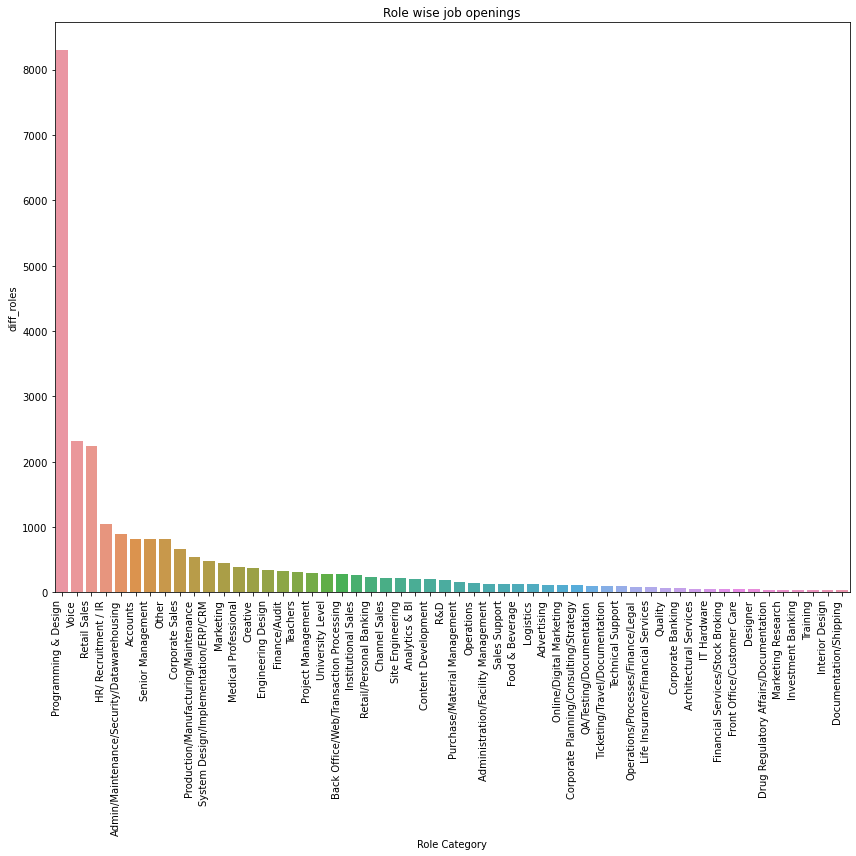

In [51]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Role Category", y="diff_roles", data=role_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Role wise job openings')
plt.tight_layout()
plt.show()

In [52]:
industry_wise_job=jobs.groupby(['Industry']).size().reset_index(name='ind_roles').sort_values('ind_roles',ascending=False)

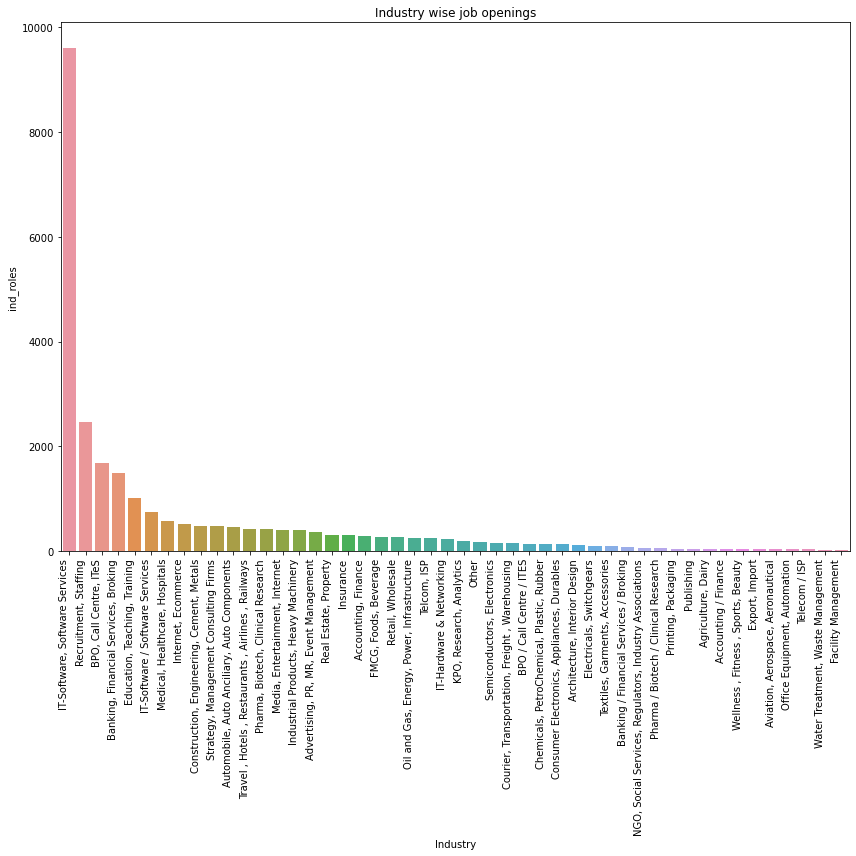

In [53]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Industry", y="ind_roles", data=industry_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Industry wise job openings')
plt.tight_layout()
plt.show()

In [54]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [55]:
print(jobs)

                                Uniq Id            Crawl Timestamp  \
0      9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1      3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2      ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3      7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4      2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   
...                                 ...                        ...   
29781  3510f2146b514f112eaa9706a16b3900  2019-07-06 21:12:51 +0000   
29782  4af8c56f5b4c535b1974065003f2d548  2019-08-05 23:55:08 +0000   
29783  43d5b806b26ed99d3ebfc8f366b4cdd1  2019-08-05 09:41:29 +0000   
29784  8bc87d14cf56564f16b6d4bae80180be  2019-08-06 01:44:55 +0000   
29785  9c7045d111814a6f39fe461eab2b0bf8  2019-07-06 22:24:55 +0000   

                                               Job Title  \
0                                  Digital Media Planner   
1                               Online 

In [56]:
jobs.iloc[5000]

Uniq Id                                     87f8e29a81cecf0537e4498a45843538
Crawl Timestamp                                    2019-07-04 04:35:12 +0000
Job Title                  Required 10th/12th Pass Freshers For Telecalli...
Job Salary                                          1,50,000 - 3,25,000 PA. 
Job Experience Required                                            0 - 1 yrs
Key Skills                 Customer Care| Inbound Process| Night Shift| C...
Role Category                                                          Other
Location                                                           Delhi NCR
Functional Area            ITES , BPO , KPO , LPO , Customer Service , Op...
Industry                                              BPO, Call Centre, ITeS
Role                                                                 Fresher
Name: 5738, dtype: object

In [57]:
jobs.isnull().any().sum()

0

In [58]:
jobs.isnull().sum().sort_values(ascending=False)

Uniq Id                    0
Crawl Timestamp            0
Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [59]:
jobs.head()

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2  Trainee Research/ Research Executive- Hi- Tech...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                   Job Salary Job Experience Required  \
0  Not Disclosed by Recruiter              5 - 10 yrs   
1  Not Disclosed by Recruiter               2 - 5 yrs   
2  Not Disclosed by Recruiter               0 - 1 yrs   
3    2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4  Not Disclosed by Recruiter               2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive  
3         IT-Software, Software Services        Technical Support Engineer  
4         IT-Software, Software Services                  Testing Engineer

In [60]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [61]:
jobs_for_predict=jobs[['Role Category',
       'Functional Area', 'Industry']]

In [62]:
jobs_for_predict.head()

Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawarehousing   
4                        Programming & Design   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry  
0  Advertising, PR, MR, Event Management  
1         IT-Software, Software Services  
2                  Recruitment, Staffing  
3         IT-Software, Software Services  
4         IT-Software, Software Services

In [63]:
mark_array=jobs_for_predict.values

In [64]:
mark_array

array([['Advertising',
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management'],
       ['Retail Sales', 'Sales , Retail , Business Development',
        'IT-Software, Software Services'],
       ['R&D', 'Engineering Design , R&D', 'Recruitment, Staffing'],
       ...,
       ['University Level',
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training'],
       ['Programming & Design',
        'IT Software - Application Programming , Maintenance',
        'IT-Software, Software Services'],
       ['Online/Digital Marketing',
        'Marketing , Advertising , MR , PR , Media Planning',
        'IT-Software, Software Services']], dtype=object)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 52270.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 51854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2102, cost: 46169.0
Init: initializing centroids
Init: initializing clusters
Starting iterat

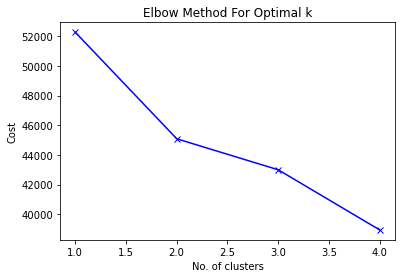

In [65]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(mark_array)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
# Building the model with 30 clusters
kmode = KModes(n_clusters=30, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(mark_array)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4555, cost: 22653.0
Run 1, iteration: 2/100, moves: 608, cost: 22448.0
Run 1, iteration: 3/100, moves: 41, cost: 22448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7955, cost: 22284.0
Run 2, iteration: 2/100, moves: 1349, cost: 22284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3917, cost: 22122.0
Run 3, iteration: 2/100, moves: 149, cost: 22122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3658, cost: 23810.0
Run 4, iteration: 2/100, moves: 303, cost: 23810.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3557, cost: 23993.0
Run 5, iteration: 2/100, moves: 116, cost: 23993.0
Best run was number 3


array([ 0, 10,  4, ..., 25,  1,  0], dtype=uint16)

In [67]:
jobs.insert(0, "Cluster", clusters, True)
jobs

Cluster                           Uniq Id            Crawl Timestamp  \
0            0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1           10  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2            4  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3            7  7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4           29  2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   
...        ...                               ...                        ...   
29781        1  3510f2146b514f112eaa9706a16b3900  2019-07-06 21:12:51 +0000   
29782        9  4af8c56f5b4c535b1974065003f2d548  2019-08-05 23:55:08 +0000   
29783       25  43d5b806b26ed99d3ebfc8f366b4cdd1  2019-08-05 09:41:29 +0000   
29784        1  8bc87d14cf56564f16b6d4bae80180be  2019-08-06 01:44:55 +0000   
29785        0  9c7045d111814a6f39fe461eab2b0bf8  2019-07-06 22:24:55 +0000   

                                               Job Title  \
0                                  Digital Media Planner   
1                               Online Bidding Executive   
2      Trainee Research/ Research Executive- Hi- Tech...   
3                                      Technical Support   
4                      Software Test Engineer -hyderabad   
...                                                  ...   
29781                              MTS-Software-Engineer   
29782                        Client Relationship Manager   
29783                                   Assoc. Prof.- CS   
29784         Application/Cyber Security Specialist-Pune   
29785                         Press Release Writer - SEO   

                       Job Salary Job Experience Required  \
0      Not Disclosed by Recruiter              5 - 10 yrs   
1      Not Disclosed by Recruiter               2 - 5 yrs   
2      Not Disclosed by Recruiter               0 - 1 yrs   
3        2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4      Not Disclosed by Recruiter               2 - 5 yrs   
...                           ...                     ...   
29781  Not Disclosed by Recruiter              9 - 12 yrs   
29782  Not Disclosed by Recruiter               1 - 5 yrs   
29783  Not Disclosed by Recruiter               4 - 6 yrs   
29784  Not Disclosed by Recruiter              5 - 10 yrs   
29785  Not Disclosed by Recruiter               2 - 7 yrs   

                                              Key Skills  \
0                          Media Planning| Digital Media   
1      pre sales| closing| software knowledge| client...   
2      Computer science| Fabrication| Quality check| ...   
3                                      Technical Support   
4      manual testing| test engineering| test cases| ...   
...                                                  ...   
29781  Graphics| C++| USB| Project management| SOC| F...   
29782  Service delivery| LMS| CRE| Integration servic...   
29783      Counselor| Mentor| Trainer| Advisor| Teaching   
29784  Security Analysis| Software Development Life C...   
29785  Press release| Public relations| Publishing| W...   

                                    Role Category   Location  \
0                                     Advertising     Mumbai   
1                                    Retail Sales  Pune,Pune   
2                                             R&D    Gurgaon   
3      Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                            Programming & Design  Hyderabad   
...                                           ...        ...   
29781                        Programming & Design  Bengaluru   
29782                                  Operations    Chennai   
29783                            University Level     Howrah   
29784                        Programming & Design       Pune   
29785                    Online/Digital Marketing  Bengaluru   

                                         Functional Area  \
0      Marketing , Advertising , MR , PR , Media Plan.

In [68]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [69]:
jobs.shape

(25790, 12)

In [70]:
jobs.columns

Index(['Cluster', 'Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [71]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [72]:
dataTypeSeries = jobs.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Cluster                    uint16
Uniq Id                    object
Crawl Timestamp            object
Job Title                  object
Job Salary                 object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object


In [73]:
jobs[jobs['Cluster']==27].head(10)

Cluster                           Uniq Id            Crawl Timestamp  \
1337       27  18854afb3661932d22d96cf242f0f5b2  2019-08-05 00:10:06 +0000   
2122       27  b12627e20cea2198c7fac34cf14e6d3e  2019-08-04 14:55:08 +0000   
2186       27  c7ac8e3907753324ff14393b2b3bb37c  2019-08-05 14:06:19 +0000   
2871       27  1c5f53202e502901606056820f1376cc  2019-08-04 22:47:10 +0000   
2930       27  cc4ba2d17e8b797148090fed51deddea  2019-07-06 21:27:31 +0000   
3129       27  1aefdccb99ba0f6a5179e42370275b74  2019-08-04 15:28:07 +0000   
3151       27  f17508872c3ded477d1086129baa4652  2019-07-04 18:45:55 +0000   
3233       27  4ebd723fe292bb233af6277570c7a255  2019-07-07 04:24:42 +0000   
3278       27  3e096ba1a58620d0f4209cc3459b89e4  2019-07-04 01:54:39 +0000   
3428       27  23f50652e31a6f43c4097511810030f9  2019-07-04 03:51:53 +0000   

                                              Job Title  \
1337  Urgent Requirement For the Executive Field Inv...   
2122                 Deputy Manager/manager - Actuarial   
2186                                    Pricing Manager   
2871  Urgent Requirement of Executive-corporate Rela...   
2930  Branch Operation Executive � Top Life Insuranc...   
3129                               Relationship Manager   
3151      Senior Manager - IFRS 17 Regulatory Reporting   
3233                                   Actuarial Intern   
3278      Senior Agency Development Manager - Insurance   
3428                   Manager - Sales - Life Insurance   

                          Job Salary Job Experience Required  \
1337        1,50,000 - 2,00,000 PA.                0 - 4 yrs   
2122      Not Disclosed by Recruiter               2 - 6 yrs   
2186   INR 15,00,000 - 20,00,000 PA.            5 - 10 Years   
2871        1,50,000 - 2,50,000 PA.                1 - 5 yrs   
2930     INR 1,75,000 - 2,50,000 PA.             1 - 5 Years   
3129        2,00,000 - 4,25,000 PA.                1 - 6 yrs   
3151      Not Disclosed by Recruiter             15 - 18 yrs   
3233      Not Disclosed by Recruiter               0 - 2 yrs   
3278      Not Disclosed by Recruiter              8 - 12 yrs   
3428      Not Disclosed by Recruiter               4 - 9 yrs   

                                             Key Skills  \
1337                Health Claims| Communication Skills   
2122                       Business Planning| Actuarial   
2186  actuarial team manager|actuarial assistant man...   
2871  Health Claims| Communication Skills| TPA| Insu...   
2930  Customer Service|Policy Servicing|Operations|L...   
3129  Direct Marketing| Go Getter| Need Analysis| Cr...   
3151  Financial Reporting| SAS SQL| Regulatory Repor...   
3233  Customer Service| Help Desk| Information| Tele...   
3278  Agency Development| Agency Development Manager...   
3428  Manager - Sales| Life Insurance| Sales| Life I...   

                           Role Category  \
1337  Operations/Processes/Finance/Legal   
2122   Life Insurance/Financial Services   
2186   Life Insurance/Financial Services   
2871                   Corporate Banking   
2930  Operations/Processes/Finance/Legal   
3129   Life Insurance/Financial Services   
3151    Financial Services/Stock Broking   
3233   Life Insurance/Financial Services   
3278   Life Insurance/Financial Services   
3428   Life Insurance/Financial Services   

                                           Location  \
1337                                      Faridabad   
2122                                         Mumbai   
2186                                         Mumbai   
2871                                      Faridabad   
2930                    Ahmedabad, Mumbai, Vadodara   
3129                               Bengaluru,Mysore   
3151                              Bengaluru,Gurgaon   
3233                        Bengaluru,other - other   
3278  Ahmedabad,Bengaluru,Chennai,Hyderabad,Kolkata   
3428                                  Kolkata,Delhi   

                                        Functional 

In [74]:
jobs.columns

Index(['Cluster', 'Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [75]:
jobs = jobs[['Cluster', 'Uniq Id','Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role', 'Job Title']]

In [76]:
jobs.head()

Cluster                           Uniq Id  \
0        0  9be62c49a0b7ebe982a4af1edaa7bc5f   
1       10  3c52d436e39f596b22519da2612f6a56   
2        4  ffad8a2396c60be2bf6d0e2ff47c58d4   
3        7  7b921f51b5c2fb862b4a5f7a54c37f75   
4       29  2d8b7d44e138a54d5dc841163138de50   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1  pre sales| closing| software knowledge| client...   
2  Computer science| Fabrication| Quality check| ...   
3                                  Technical Support   
4  manual testing| test engineering| test cases| ...   

                                Role Category   Location  \
0                                 Advertising     Mumbai   
1                                Retail Sales  Pune,Pune   
2                                         R&D    Gurgaon   
3  Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                        Programming & Design  Hyderabad   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                                Industry                              Role  \
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager   
1         IT-Software, Software Services           Sales Executive/Officer   
2                  Recruitment, Staffing                     R&D Executive   
3         IT-Software, Software Services        Technical Support Engineer   
4         IT-Software, Software Services                  Testing Engineer   

                                           Job Title  
0                              Digital Media Planner  
1                           Online Bidding Executive  
2  Trainee Research/ Research Executive- Hi- Tech...  
3                                  Technical Support  
4                  Software Test Engineer -hyderabad

In [77]:
X = jobs.iloc[:,:-2]
y = jobs.iloc[:,7]

In [78]:
X

Cluster                           Uniq Id  \
0            0  9be62c49a0b7ebe982a4af1edaa7bc5f   
1           10  3c52d436e39f596b22519da2612f6a56   
2            4  ffad8a2396c60be2bf6d0e2ff47c58d4   
3            7  7b921f51b5c2fb862b4a5f7a54c37f75   
4           29  2d8b7d44e138a54d5dc841163138de50   
...        ...                               ...   
29781        1  3510f2146b514f112eaa9706a16b3900   
29782        9  4af8c56f5b4c535b1974065003f2d548   
29783       25  43d5b806b26ed99d3ebfc8f366b4cdd1   
29784        1  8bc87d14cf56564f16b6d4bae80180be   
29785        0  9c7045d111814a6f39fe461eab2b0bf8   

                                              Key Skills  \
0                          Media Planning| Digital Media   
1      pre sales| closing| software knowledge| client...   
2      Computer science| Fabrication| Quality check| ...   
3                                      Technical Support   
4      manual testing| test engineering| test cases| ...   
...                                                  ...   
29781  Graphics| C++| USB| Project management| SOC| F...   
29782  Service delivery| LMS| CRE| Integration servic...   
29783      Counselor| Mentor| Trainer| Advisor| Teaching   
29784  Security Analysis| Software Development Life C...   
29785  Press release| Public relations| Publishing| W...   

                                    Role Category   Location  \
0                                     Advertising     Mumbai   
1                                    Retail Sales  Pune,Pune   
2                                             R&D    Gurgaon   
3      Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                            Programming & Design  Hyderabad   
...                                           ...        ...   
29781                        Programming & Design  Bengaluru   
29782                                  Operations    Chennai   
29783                            University Level     Howrah   
29784                        Programming & Design       Pune   
29785                    Online/Digital Marketing  Bengaluru   

                                         Functional Area  \
0      Marketing , Advertising , MR , PR , Media Plan...   
1                  Sales , Retail , Business Development   
2                               Engineering Design , R&D   
3      IT Software - Application Programming , Mainte...   
4                             IT Software - QA & Testing   
...                                                  ...   
29781  IT Software - Embedded , EDA , VLSI , ASIC , C...   
29782  ITES , BPO , KPO , LPO , Customer Service , Op...   
29783      Teaching , Education , Training , Counselling   
29784  IT Software - Application Programming , Mainte...   
29785  Marketing , Advertising , MR , PR , Media Plan...   

                                    Industry  
0      Advertising, PR, MR, Event Management  
1             IT-Software, Software Services  
2                      Recruitment, Staffing  
3             IT-Software, Software Services  
4             IT-Software, Software Services  
...                                      ...  
29781            Semiconductors, Electronics  
29782          Education, Teaching, Training  
29783          Education, Teaching, Training  
29784         IT-Software, Software Services  
29785         IT-Software, Software Services  

[25790 rows x 7 columns]

In [79]:
y

0                  Media Planning Executive/Manager
1                           Sales Executive/Officer
2                                     R&D Executive
3                        Technical Support Engineer
4                                  Testing Engineer
                            ...                    
29781                            Software Developer
29782                            Operations Manager
29783                            Lecturer/Professor
29784                            Software Developer
29785    Search Engine Optimisation /SEO Specialist
Name: Role, Length: 25790, dtype: object

In [80]:
X['Role Category'].unique()

array(['Advertising', 'Retail Sales', 'R&D',
       'Admin/Maintenance/Security/Datawarehousing',
       'Programming & Design', 'Institutional Sales', 'Voice',
       'Corporate Planning/Consulting/Strategy', 'Operations',
       'Online/Digital Marketing', 'Engineering Design', 'Accounts',
       'Retail/Personal Banking', 'QA/Testing/Documentation',
       'Project Management', 'Logistics', 'Technical Support',
       'Senior Management', 'Content Development', 'HR/ Recruitment / IR',
       'Corporate Sales', 'Architectural Services',
       'Front Office/Customer Care',
       'Production/Manufacturing/Maintenance', 'Creative',
       'Channel Sales', 'Sales Support',
       'System Design/Implementation/ERP/CRM',
       'Back Office/Web/Transaction Processing', 'Quality',
       'Analytics & BI', 'Other', 'Finance/Audit', 'University Level',
       'Drug Regulatory Affairs/Documentation', 'Teachers',
       'Food & Beverage', 'Administration/Facility Management',
       'Purchase

In [81]:
X['Functional Area'].unique()

array(['Marketing , Advertising , MR , PR , Media Planning',
       'Sales , Retail , Business Development',
       'Engineering Design , R&D',
       'IT Software - Application Programming , Maintenance',
       'IT Software - QA & Testing',
       'ITES , BPO , KPO , LPO , Customer Service , Operations',
       'Strategy , Management Consulting , Corporate Planning',
       'IT Software - eCommerce , Internet Technologies',
       'Accounts , Finance , Tax , Company Secretary , Audit',
       'Financial Services , Banking , Investments , Insurance',
       'IT Software - DBA , Datawarehousing',
       'IT Software - Network Administration , Security',
       'Purchase / Logistics / Supply Chain',
       'IT Hardware , Technical Support , Telecom Engineering',
       'IT Software - Mobile', 'Journalism , Editing , Content',
       'HR , Recruitment , Administration , IR',
       'Architecture , Interior Design', 'IT Software - Other',
       'IT Software - Embedded , EDA , VLSI , ASIC

In [82]:
X['Location'].unique()

array(['Mumbai', 'Pune,Pune', 'Gurgaon', ...,
       'Delhi NCR (New Friends Colony)', 'Bengaluru,Bhubaneshwar',
       'Howrah'], dtype=object)

In [83]:
X['Role'].unique()

KeyError: 'Role'

In [ ]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()

X['Key Skills']= label_encoder.fit_transform(X['Key Skills'])
 
X['Key Skills'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X['Role Category']= label_encoder.fit_transform(X['Role Category'])
 
X['Role Category'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X['Location']= label_encoder.fit_transform(X['Location'])
 
X['Location'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X['Functional Area']= label_encoder.fit_transform(X['Functional Area'])
 
X['Functional Area'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X['Industry']= label_encoder.fit_transform(X['Industry'])
 
X['Industry'].unique()

In [ ]:
X.columns

In [ ]:
X = X[['Cluster', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry']]

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 30))

#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(X_train, y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
score = dtree.score(X_test, y_test)
print(score)